In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import SG_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)
GT = 0.195595


plt.rcParams['figure.dpi'] = 300

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = NormalRV(np.array([1, -1]), np.array([[2, -0.5], [-0.5, 2]]))

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)


In [ ]:

N = 1000
Niter = 4*int(1e4)
alpha_SG = 1e-5
nexperiments = 10
results_array_SG = []
distribution_array_SG = []
for _ in range(nexperiments):
    r_SG, d_SG = SG_OAIS(phi, pi, q, N, Niter, alpha=alpha_SG, fixed=False, proj_eps=1e-12, proj_set=1e-3)
    results_array_SG.append(r_SG)
    distribution_array_SG.append(d_SG)


In [11]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter

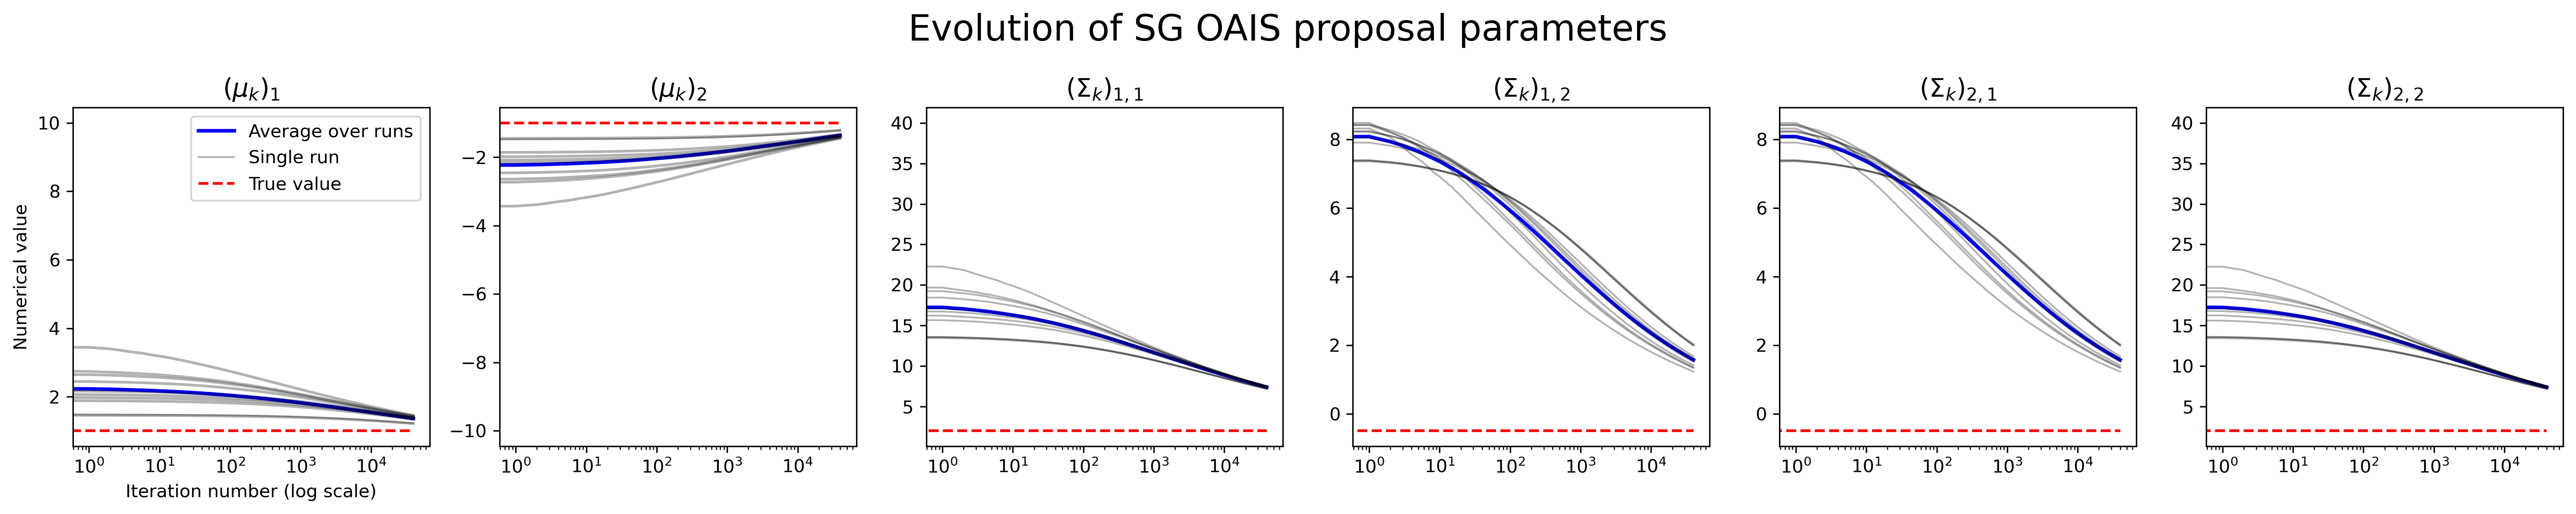

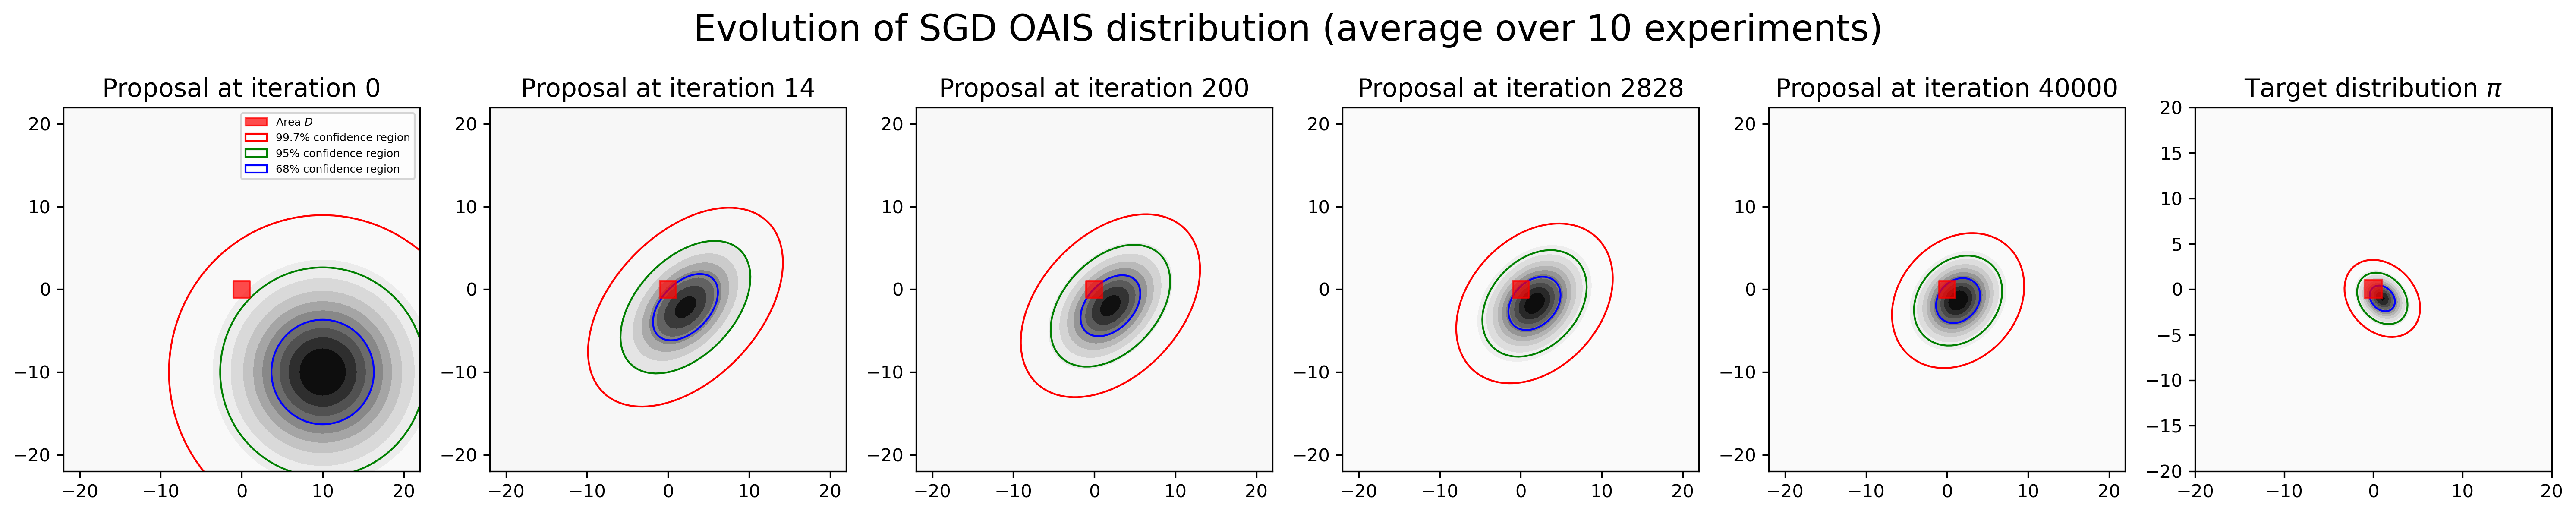

In [17]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "SGD"
title = f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal parameters"
plotter(distribution_array_SG, pi, title=title, mix=False, alpha=0.3)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/params_evolution.png")
plt.show()
plot_contours(distribution_array_SG, pi, title=f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal distribution (average over {nexperiments} experiments)", mix=False)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_contours.png")
plt.show()

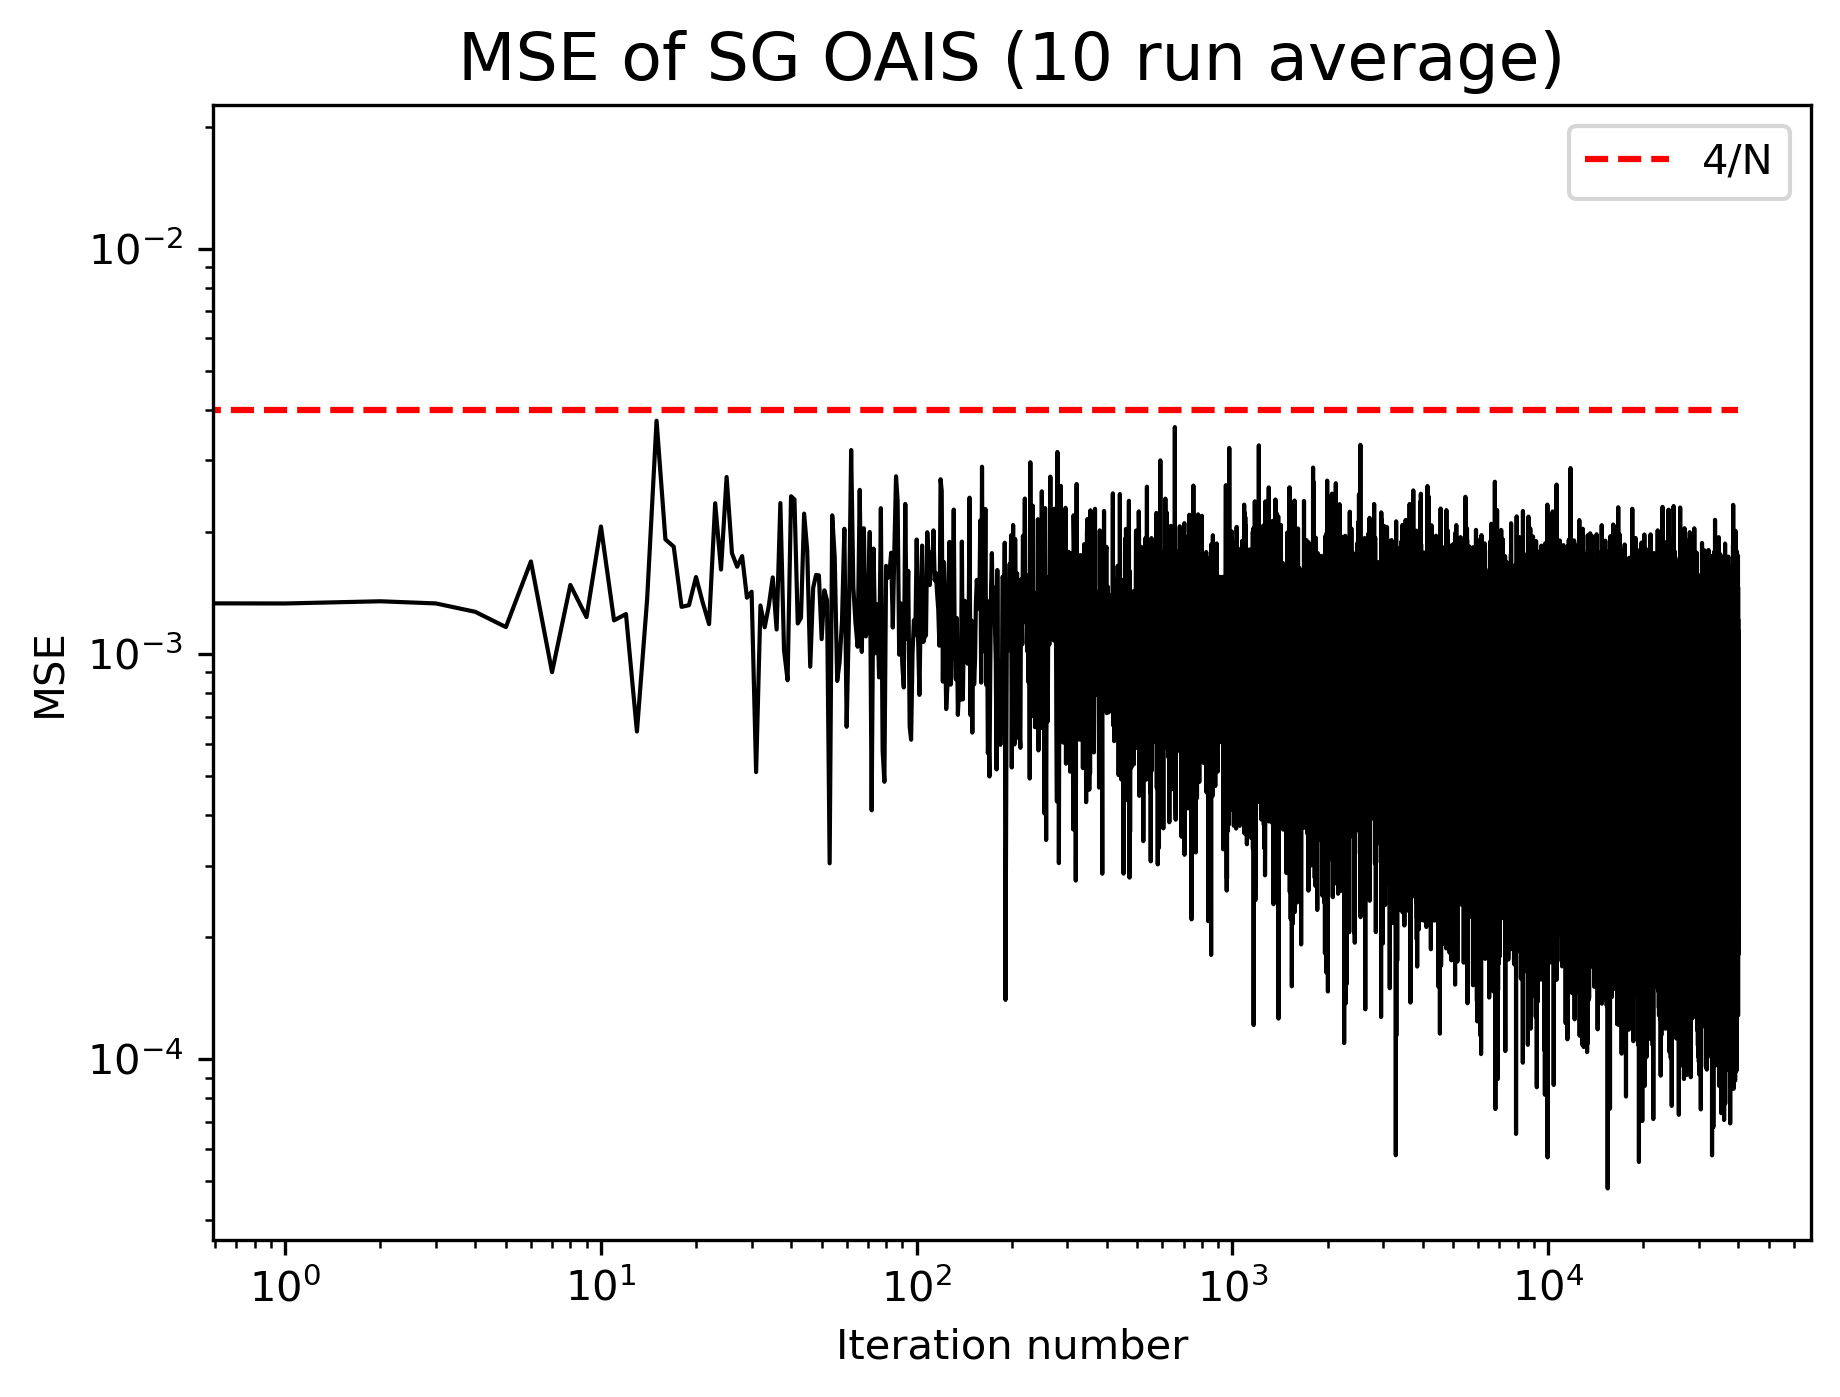

In [20]:
GT = 0.195595
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plot_mse
plot_mse(results_array_SG, GT, title=f"Evolution of {optimiser} OAIS MSE (average over {nexperiments} experiments)")
plt.title(f"MSE of {optimiser if optimiser!='SGD' else 'SG'} OAIS ({nexperiments} run average)", fontsize=16)
plt.hlines(4/N, 0, Niter, color="red", label="4/N", linestyles="dashed")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/mse.png", bbox_inches='tight')

In [3]:
N = 1000
Niter = int(1e4)
alpha_SG_fail = 1e-4
nexperiments = 10
results_array_SG_fail = []
distribution_array_SG_fail = []
for _ in range(nexperiments):
    r_SG, d_SG = SG_OAIS(phi, pi, q, N, Niter, alpha=alpha_SG_fail, fixed=False, proj_eps=1e-12, proj_set=1e-3)
    results_array_SG_fail.append(r_SG)
    distribution_array_SG_fail.append(d_SG)


  3%|▎         | 266/10000 [00:03<01:39, 97.85it/s] 

projecting
705.0159061666923


  1%|          | 120/10000 [00:01<01:40, 98.79it/s]

projecting
1580.1890199946497


  0%|          | 22/10000 [00:00<01:35, 104.25it/s]

projecting
4484.033391347333


  1%|          | 77/10000 [00:00<01:35, 103.40it/s]

projecting
813.5049203797171


  0%|          | 43/10000 [00:00<01:38, 100.63it/s]

projecting
1520.687174501339


100%|██████████| 10000/10000 [01:36<00:00, 103.60it/s]


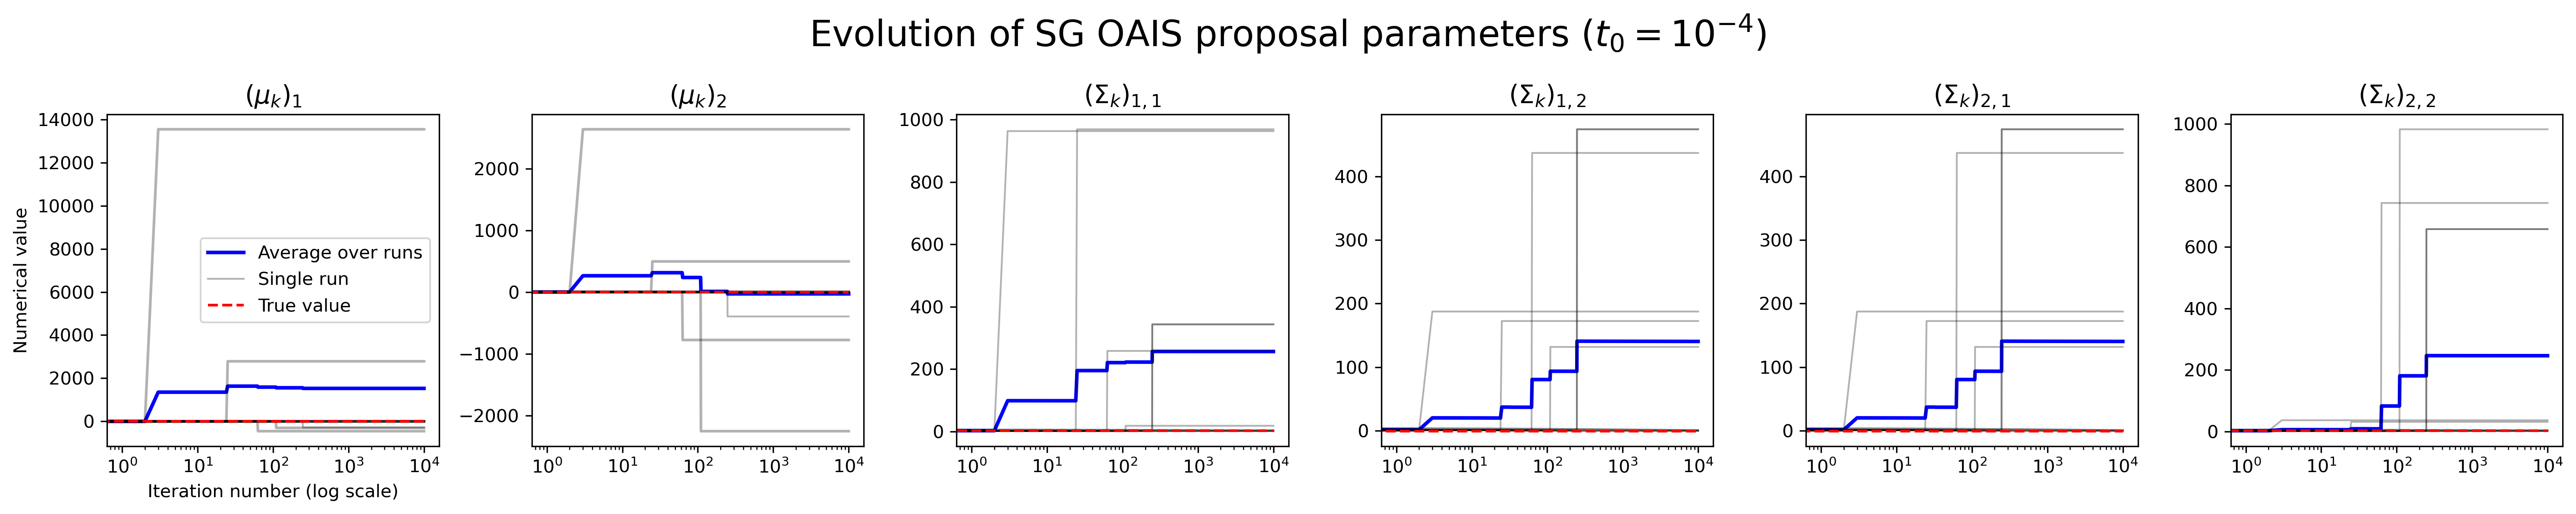

In [9]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter, plot_contours, plot_mse
optimiser = "SGD"
title = f"Evolution of {optimiser if optimiser != 'SGD' else 'SG'} OAIS proposal parameters ($t_0 = 10^{{-4}}$)"
plotter(distribution_array_SG_fail, pi, title=title, mix=False, alpha=0.3)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/params_evolution_failure.png")
plt.show()
#plot_contours(distribution_array_SG_fail, pi, title=f"Evolution of SG OAIS proposal distribution (average over {nexperiments} experiments)", mix=False)
#plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/gaussians/{optimiser}/{optimiser}_contours.png")
#plt.show()